In [1]:
# load necessary libraries
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

# Load the csv files
raw_data = pd.read_csv('data/raw_data.csv')
incremental_data = pd.read_csv('data/incremental_data.csv')

# look at the first few rows of each data set
print("Raw Data Sample:\n") 
print(raw_data.head())
print("\nIncremental Data Sample:\n")
print(incremental_data.head())


Raw Data Sample:

   order_date customer_id gender                             product  \
0   5/16/2022  91-1384302   Male                Sriracha Chili Sauce   
1  10/18/2023  28-8266510   Male                  Herb Garlic Butter   
2    4/1/2021  75-6932352   Male  Outdoor Mosquito Repellent Lantern   
3   1/11/2021  69-2612638   Male                     Almond Joy Bars   
4    1/6/2024  01-5279721   Male                     Sourdough Bread   

               category   quantity  unit_price   payment_method        region  \
0     Food - Condiments   2.311552        2.79       mastercard           NaN   
1     Food - Condiments  12.672940        3.99  americanexpress         Braga   
2               Outdoor  15.813123       34.99       mastercard  Pennsylvania   
3  Food - Confectionery  18.074695        1.29         bankcard           NaN   
4         Food - Bakery   9.617337        4.99     instapayment           NaN   

         country   latitude   longitude  
0          Japan  34

In [2]:
# Handling missing values
def missing_values(data, axis=0, columns=None):
    if columns != None:
        data.dropna(axis=axis, subset=columns, inplace=True)
    else:
        self.data.dropna(axis=axis, inplace=True)
    return data

# Remove rows with missing values in specified columns
missing_values(raw_data, axis=0, columns=['customer_id', 'product', 'country', 'category'])
missing_values(incremental_data, axis=0, columns=['customer_id', 'product', 'category'])

# Drop columns with significant missing values
raw_data.drop(axis=1, columns=['region', 'longitude', 'latitude'], inplace=True)
incremental_data.drop(axis=1, columns=['region', 'longitude', 'latitude'], inplace=True)

# Rename missing payment_method values to 'Cash_Transaction'
raw_data['payment_method'] = raw_data['payment_method'].fillna('Cash_Transaction')
incremental_data['payment_method'] = incremental_data['payment_method'].fillna('Cash_Transaction')

# inspect the data after handling missing values
print("Raw Data after handling missing values:\n")
print(raw_data.info())
print(f"\n{raw_data.describe()}")
print(f"\n{raw_data.head()}")

print("\nIncremental Data after handling missing values:\n")
print(incremental_data.info())
print(f"\n{incremental_data.describe()}")
print(f"\n{incremental_data.head()}")



Raw Data after handling missing values:

<class 'pandas.core.frame.DataFrame'>
Index: 9578 entries, 0 to 10845
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_date      9578 non-null   object 
 1   customer_id     9578 non-null   object 
 2   gender          9578 non-null   object 
 3   product         9578 non-null   object 
 4   category        9578 non-null   object 
 5   quantity        9578 non-null   float64
 6   unit_price      9578 non-null   float64
 7   payment_method  9578 non-null   object 
 8   country         9578 non-null   object 
dtypes: float64(2), object(7)
memory usage: 748.3+ KB
None

          quantity   unit_price
count  9578.000000  9578.000000
mean      9.896192    26.621318
std       9.670324    44.866366
min       0.000779     0.750000
25%       2.956303     3.990000
50%       7.035275    12.990000
75%      13.812589    34.990000
max      92.844367   899.990000

   order_date

In [11]:
# convert columns to appropriate data types
raw_data['order_date'] = pd.to_datetime(raw_data['order_date'], format='%m/%d/%Y')
incremental_data['order_date'] = pd.to_datetime(incremental_data['order_date'], format='%Y-%m-%d')

cat_columns = ['product', 'country', 'category', 'payment_method', 'gender']
raw_data[cat_columns] = raw_data[cat_columns].astype('category')
incremental_data[cat_columns] = incremental_data[cat_columns].astype('category')

# inspect the data after type conversion
print("Raw Data after type conversion:\n")
print(raw_data.info())
print(f"\n{raw_data.describe()}")
print(f"\n{raw_data.head()}")

print("\nIncremental Data after type conversion:\n")
print(incremental_data.info())
print(f"\n{incremental_data.describe()}")
print(f"\n{incremental_data.head()}")


Raw Data after type conversion:

<class 'pandas.core.frame.DataFrame'>
Index: 9578 entries, 0 to 10845
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_date      9578 non-null   datetime64[ns]
 1   customer_id     9578 non-null   object        
 2   gender          9578 non-null   category      
 3   product         9578 non-null   category      
 4   category        9578 non-null   category      
 5   quantity        9578 non-null   float64       
 6   unit_price      9578 non-null   float64       
 7   payment_method  9578 non-null   category      
 8   country         9578 non-null   category      
dtypes: category(5), datetime64[ns](1), float64(2), object(1)
memory usage: 539.3+ KB
None

                          order_date     quantity   unit_price
count                           9578  9578.000000  9578.000000
mean   2023-05-23 21:21:50.252662528     9.896192    26.621318
min         

Raw Data Grouped by Country and Category:


country      category     
Afghanistan  Accessories       594.934084
             Automotive        126.415915
             Beauty            199.748898
             Electronics       309.762424
             Fitness            80.788795
                                 ...     
Zimbabwe     Food - Meat        68.791739
             Food - Snacks       8.302545
             Health            113.013388
             Home               13.780269
             Outdoor          1699.712368
Name: revenue, Length: 2823, dtype: float64

Incremental Data Grouped by Payment Method and Category:


payment_method    category   
Cash_Transaction  Accessories    2497.745556
                  Apps            104.101440
                  Audio          2212.266090
                  Automotive      257.701828
                  Beauty         1116.009840
                                    ...     
visa              Office           94.674241
                  

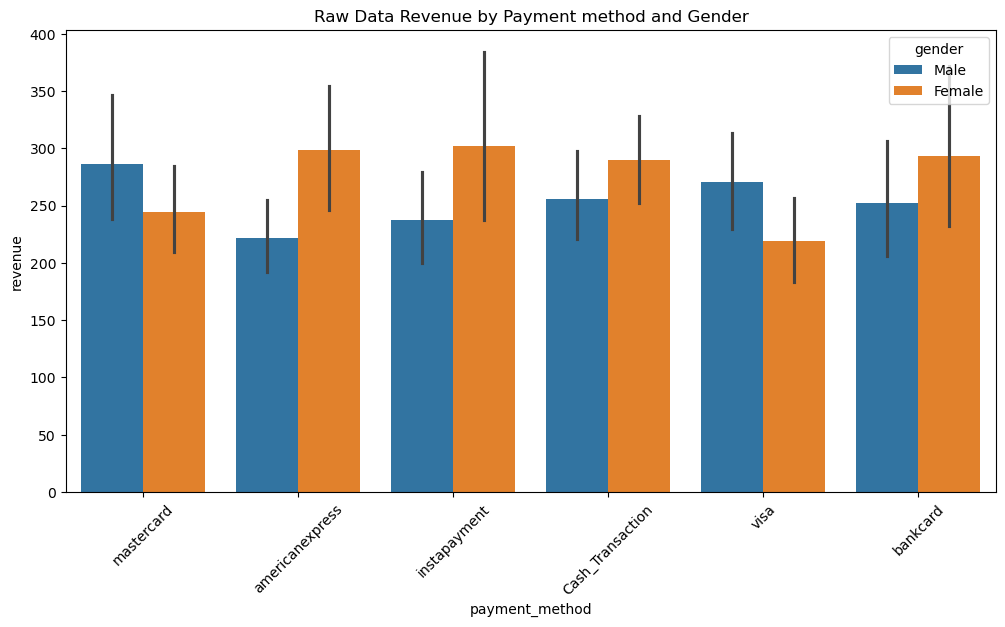

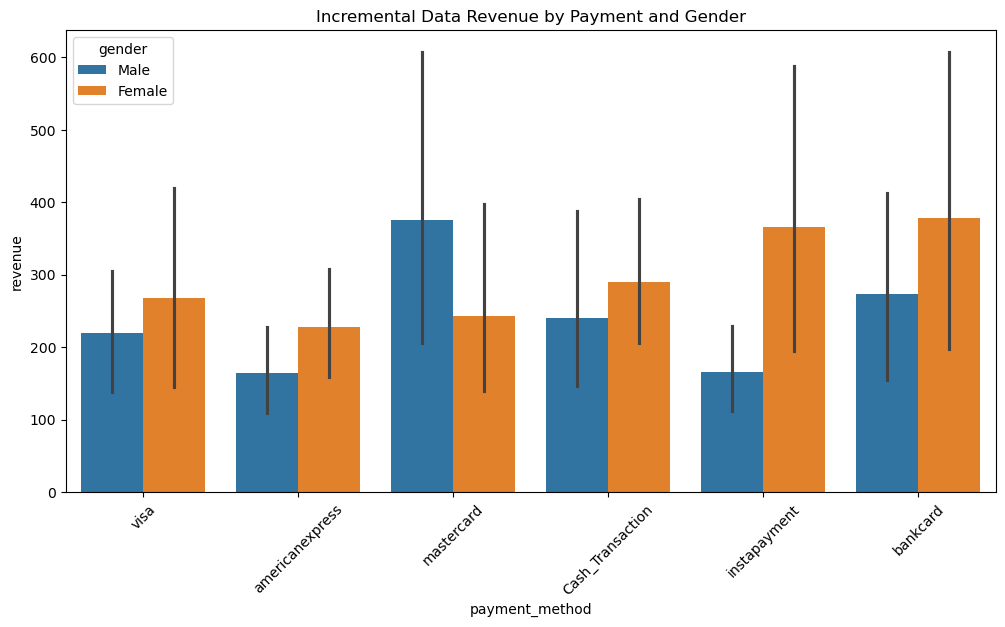

In [6]:
# Create new features revenue
raw_data['revenue'] = raw_data['quantity'] * raw_data['unit_price']
incremental_data['revenue'] = incremental_data['quantity'] * incremental_data['unit_price']

# Group by country, category and payment method to analyze revenue distribution
raw_data_grouped = raw_data.groupby(['country', 'category'])['revenue'].sum()
incremental_data_grouped = incremental_data.groupby(['payment_method', 'category'])['revenue'].sum()

# inspect the grouped data
print("Raw Data Grouped by Country and Category:\n")    
print(f"\n{raw_data_grouped}")

print("\nIncremental Data Grouped by Payment Method and Category:\n")
print(f"\n{incremental_data_grouped}")

# Visualize the revenue distribution by payment method and gender
plt.figure(figsize=(12, 6))
sns.barplot(data=raw_data, x='payment_method', y='revenue', hue='gender')
plt.title('Raw Data Revenue by Payment method and Gender')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=incremental_data, x='payment_method', y='revenue', hue='gender')
plt.title('Incremental Data Revenue by Payment and Gender')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Save the extracted data to a new CSV file
raw_data_grouped.to_csv('transformed/transformed_full.csv')
incremental_data_grouped.to_csv('transformed/transformed_incremental.csv')